In [13]:
import numpy as np

# Load the specified columns (1-indexed: 2nd, 4th, and 6th) from the CSV file
data = np.genfromtxt('Kuperman-BRM-data-2012.csv', delimiter=',', skip_header=1, usecols=(1, 3, 5), dtype=float, encoding='utf-8', missing_values='NA', filling_values=np.nan)

print(data)

[[1.900e+01 1.580e+00 4.120e+02]
 [1.900e+01 1.890e+00 5.289e+03]
 [2.100e+01 2.000e+00 5.000e-01]
 ...
 [2.100e+01       nan 5.000e-01]
 [2.100e+01       nan 5.000e-01]
 [2.100e+01       nan 5.000e-01]]


In [14]:
# Process the data to extract meaningful information
# Each row contains: [number of participants, average age of acquisition, frequency count]
for row in data:
    participants = int(row[0])
    avg_age = row[1]
    frequency = int(row[2])
    with open('age of acusation-frequincy.txt', 'a') as f:
        f.write(f"Participants: {participants}, Average Age of Acquisition: {avg_age}, Frequency: {frequency}\n")

In [15]:
# Check the shape of the array
print("Shape of the array:", data.shape)

# Check the data type of the array
print("Data type of the array:", data.dtype)

# Calculate basic statistics
print("Minimum value in each column:", np.min(data, axis=0))
print("Maximum value in each column:", np.max(data, axis=0))
print("Mean value in each column:", np.mean(data, axis=0))
print("Standard deviation in each column:", np.std(data, axis=0))

Shape of the array: (30121, 3)
Data type of the array: float64
Minimum value in each column: [15.   nan  0.5]
Maximum value in each column: [  1939.     nan 314232.]
Mean value in each column: [ 22.97991435          nan 446.40934896]
Standard deviation in each column: [  86.4750125            nan 5353.79530775]


In [16]:
# Filter out rows with NaN values
filtered_data = data[~np.isnan(data).any(axis=1)]

print("Filtered data (rows without NaN values):")
print(filtered_data)

Filtered data (rows without NaN values):
[[1.900e+01 1.580e+00 4.120e+02]
 [1.900e+01 1.890e+00 5.289e+03]
 [2.100e+01 2.000e+00 5.000e-01]
 ...
 [1.900e+01 2.100e+01 2.000e+00]
 [1.900e+01 2.100e+01 1.000e+00]
 [2.100e+01 2.500e+01 5.000e-01]]


In [17]:
# Recalculate summary statistics for filtered data
min_values = np.min(filtered_data, axis=0)
max_values = np.max(filtered_data, axis=0)
mean_values = np.mean(filtered_data, axis=0)
std_dev_values = np.std(filtered_data, axis=0)

# Print the summary statistics
print("Summary Statistics for Filtered Data:")
print(f"Minimum values: {min_values}")
print(f"Maximum values: {max_values}")
print(f"Mean values: {mean_values}")
print(f"Standard deviation: {std_dev_values}")

# Check for potential surprises (e.g., unusually high/low values)
threshold = 2 * std_dev_values  # Example threshold for anomalies
anomalies = np.any((filtered_data < (mean_values - threshold)) | (filtered_data > (mean_values + threshold)), axis=0)

print("\nPotential anomalies detected in columns:")
for i, anomaly in enumerate(anomalies):
    if anomaly:
        print(f"Column {i + 1} has potential anomalies.")

Summary Statistics for Filtered Data:
Minimum values: [15.    1.58  0.5 ]
Maximum values: [1.93900e+03 2.50000e+01 3.14232e+05]
Mean values: [ 22.98119726  11.09834264 446.6903528 ]
Standard deviation: [8.65022839e+01 2.99985040e+00 5.35547298e+03]

Potential anomalies detected in columns:
Column 1 has potential anomalies.
Column 2 has potential anomalies.
Column 3 has potential anomalies.


In [18]:
# Normalize the last column of the array to turn raw frequencies into relative word frequencies
filtered_data[:, -1] /= np.sum(filtered_data[:, -1])

print("Normalized data (last column as relative frequencies):")
print(filtered_data)

Normalized data (last column as relative frequencies):
[[1.90000000e+01 1.58000000e+00 3.06404607e-05]
 [1.90000000e+01 1.89000000e+00 3.93343196e-04]
 [2.10000000e+01 2.00000000e+00 3.71850252e-08]
 ...
 [1.90000000e+01 2.10000000e+01 1.48740101e-07]
 [1.90000000e+01 2.10000000e+01 7.43700503e-08]
 [2.10000000e+01 2.50000000e+01 3.71850252e-08]]


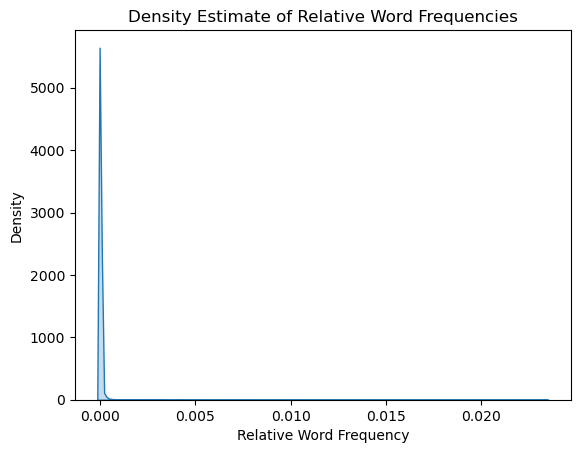

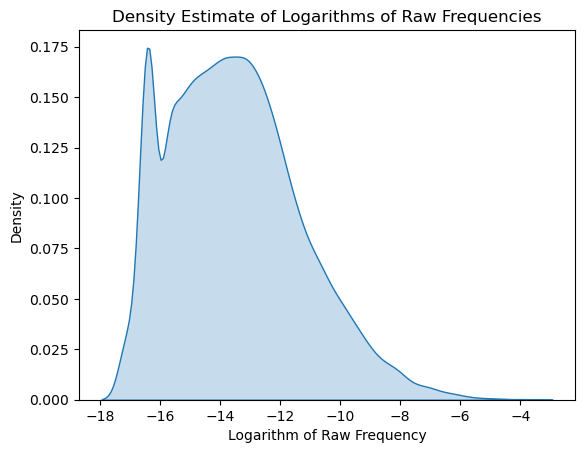

Notice if the logarithmic plot shows unusual clustering or gaps, which might indicate issues in the data.


In [19]:
import seaborn as sns

import matplotlib.pyplot as plt

# Plot a smooth density estimate of the relative word frequencies
sns.kdeplot(filtered_data[:, -1], fill=True)
plt.title("Density Estimate of Relative Word Frequencies")
plt.xlabel("Relative Word Frequency")
plt.ylabel("Density")
plt.show()

# Plot the logarithms of the raw frequencies
log_frequencies = np.log(filtered_data[:, -1])
sns.kdeplot(log_frequencies, fill=True)
plt.title("Density Estimate of Logarithms of Raw Frequencies")
plt.xlabel("Logarithm of Raw Frequency")
plt.ylabel("Density")
plt.show()

# Observations
print("Notice if the logarithmic plot shows unusual clustering or gaps, which might indicate issues in the data.")

In [20]:
# Filter the data to include only words acquired in the first four years of life
acquired_early = filtered_data[filtered_data[:, 1] <= 4]

# Count the number of words acquired early
num_words_early = len(acquired_early)

print(f"Number of English words acquired in the first four years of life: {num_words_early}")

Number of English words acquired in the first four years of life: 288


In [21]:
# Filter the data to include only words acquired by age 9
acquired_by_nine = filtered_data[filtered_data[:, 1] <= 9]

# Calculate the total frequency of words acquired by age 9
total_frequency_by_nine = np.sum(acquired_by_nine[:, -1])

# Calculate the percentage of tokens in the corpus that a nine-year-old would understand
percentage_by_nine = total_frequency_by_nine * 100

print(f"Percentage of tokens in the corpus a nine-year-old would understand: {percentage_by_nine:.2f}%")

Percentage of tokens in the corpus a nine-year-old would understand: 91.16%


In [22]:
# Sort the filtered data by relative word frequency (last column) in ascending order
sorted_indices = np.argsort(filtered_data[:, -1])
sorted_data = filtered_data[sorted_indices]

# Select the top 2500 most frequent words
top_2500 = sorted_data[-2500:]

# Filter the top 2500 words to include only those acquired by age 5
acquired_by_five = top_2500[top_2500[:, 1] <= 5]

# Count the number of words acquired by age 5
num_words_by_five = len(acquired_by_five)

print(f"Number of top-2500 most frequent words (B1 level) acquired by age 5: {num_words_by_five}")

Number of top-2500 most frequent words (B1 level) acquired by age 5: 583


In [23]:
ages = np.unique(filtered_data[:, 1])
percentages = []

for age in ages:
    acquired_by_age = filtered_data[filtered_data[:, 1] <= age]
    total_frequency_by_age = np.sum(acquired_by_age[:, -1])
    percentage_by_age = total_frequency_by_age * 100
    percentages.append(percentage_by_age)

# Calculate the year-to-year increase in comprehension
comprehension_increase = np.diff(percentages)

# Find the ages with the peak increase in comprehension
peak_years_indices = np.argsort(comprehension_increase)[-3:]  # Top 3 peak years
peak_years = ages[1:][peak_years_indices]  # Ages are shifted by one due to diff

print("Year-to-year increase in percentage of understood tokens:", comprehension_increase)
print("Ages with the peak increase in comprehension:", peak_years)

Year-to-year increase in percentage of understood tokens: [3.93343196e-02 3.71850252e-06 1.63242261e-01 ... 7.43700504e-06
 2.23110151e-05 3.71850251e-06]
Ages with the peak increase in comprehension: [4.5  3.72 5.11]


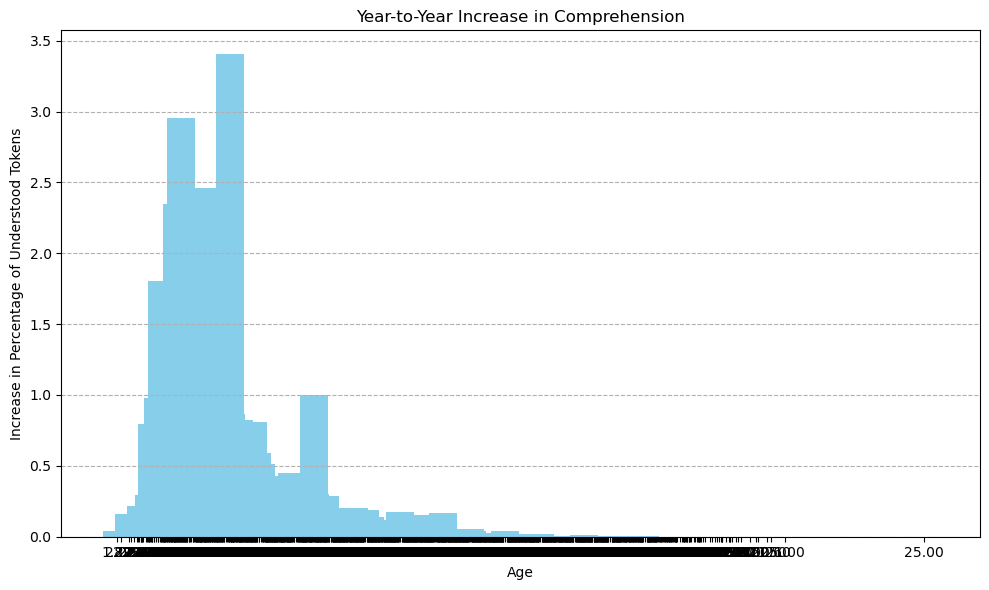

In [24]:
import matplotlib.pyplot as plt

# Plot the year-to-year increase in comprehension
ages_range = ages[1:]  # Exclude the first age since the increase is calculated from the second age onwards

plt.figure(figsize=(10, 6))
plt.bar(ages_range, comprehension_increase, color='skyblue')
plt.xlabel("Age")
plt.ylabel("Increase in Percentage of Understood Tokens")
plt.title("Year-to-Year Increase in Comprehension")
plt.xticks(ages_range)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

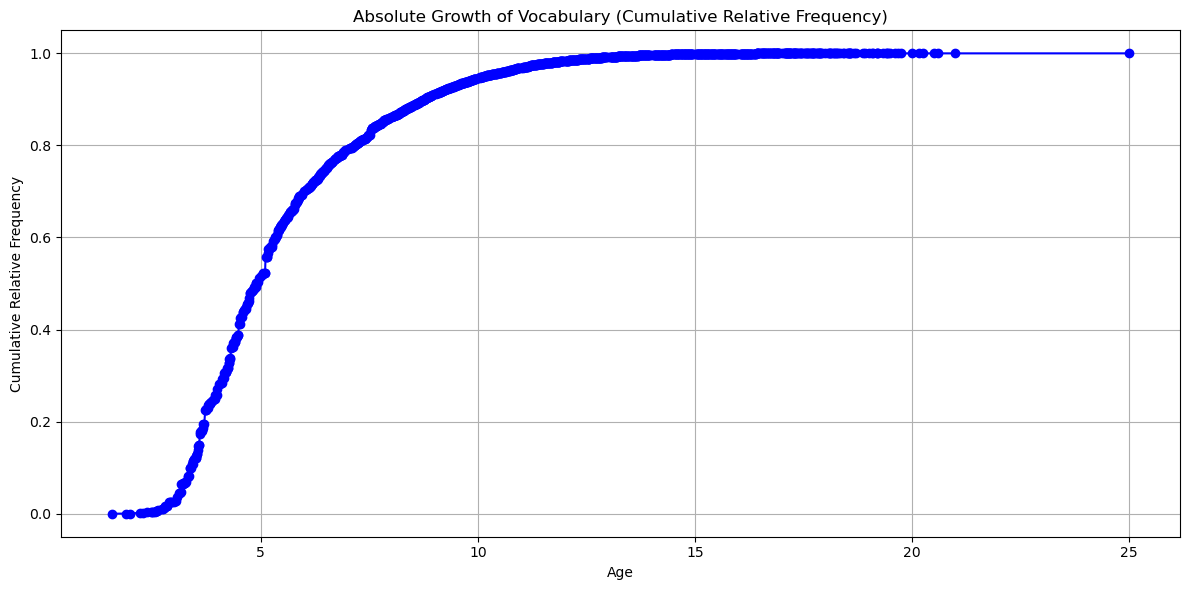

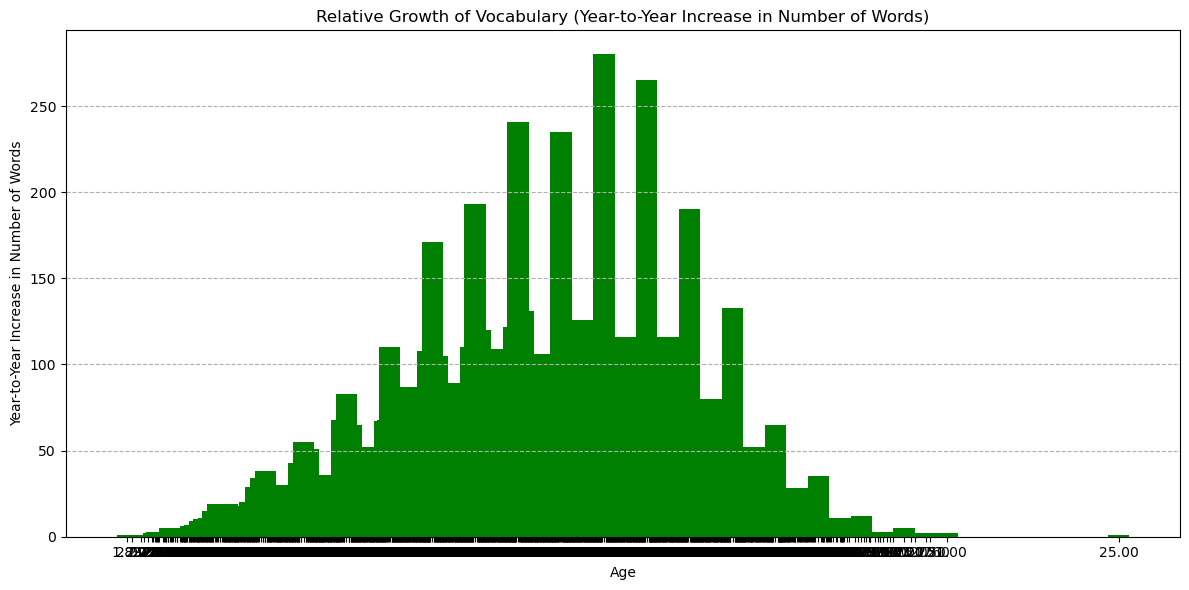

In [25]:
import matplotlib.pyplot as plt

# Calculate the cumulative frequency for each age
cumulative_frequencies = []
for age in ages:
    acquired_by_age = filtered_data[filtered_data[:, 1] <= age]
    total_frequency_by_age = np.sum(acquired_by_age[:, -1])
    cumulative_frequencies.append(total_frequency_by_age)

# Calculate the number of words acquired by each age
num_words_by_age = []
for age in ages:
    acquired_by_age = filtered_data[filtered_data[:, 1] <= age]
    num_words = len(acquired_by_age)
    num_words_by_age.append(num_words)

# Plot the absolute growth of vocabulary (cumulative frequency)
plt.figure(figsize=(12, 6))
plt.plot(ages, cumulative_frequencies, marker='o', linestyle='-', color='blue')
plt.xlabel("Age")
plt.ylabel("Cumulative Relative Frequency")
plt.title("Absolute Growth of Vocabulary (Cumulative Relative Frequency)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the relative growth of vocabulary (year-to-year increase in number of words)
vocabulary_increase = np.diff(num_words_by_age)
plt.figure(figsize=(12, 6))
plt.bar(ages[1:], vocabulary_increase, color='green', width=0.5)
plt.xlabel("Age")
plt.ylabel("Year-to-Year Increase in Number of Words")
plt.title("Relative Growth of Vocabulary (Year-to-Year Increase in Number of Words)")
plt.xticks(ages[1:])
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [26]:
# Compute negative log frequency
negative_log_frequency = -np.log(filtered_data[:, -1])

# Compute ranks for age of acquisition and negative log frequency
age_ranks = np.argsort(np.argsort(filtered_data[:, 1]))
frequency_ranks = np.argsort(np.argsort(negative_log_frequency))

# Compute Spearman rank correlation using Pearson correlation coefficient
spearman_corr = np.corrcoef(age_ranks, frequency_ranks)[0, 1]

print(f"Spearman rank correlation between age of acquisition and negative log frequency: {spearman_corr:.4f}")

Spearman rank correlation between age of acquisition and negative log frequency: 0.5774


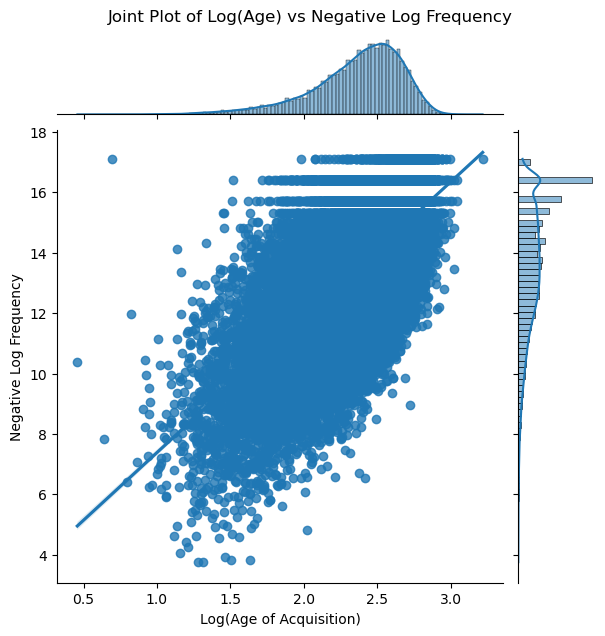

Slope of the regression line: 4.4786
Intercept of the regression line: 2.9052


In [27]:
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

# Compute negative log frequency
negative_log_frequency = -np.log(filtered_data[:, -1])

# Take the logarithm of the ages of acquisition
log_ages = np.log(filtered_data[:, 1])

# Create a joint plot of log(age) against negative log frequency with regression line
joint_plot = sns.jointplot(x=log_ages, y=negative_log_frequency, kind='reg')
joint_plot.set_axis_labels('Log(Age of Acquisition)', 'Negative Log Frequency')
plt.suptitle('Joint Plot of Log(Age) vs Negative Log Frequency', y=1.02)  # Adjust title position
plt.show()

# Extract regression parameters
slope, intercept = np.polyfit(log_ages, negative_log_frequency, 1)

print(f"Slope of the regression line: {slope:.4f}")
print(f"Intercept of the regression line: {intercept:.4f}")